<a href="https://colab.research.google.com/github/devPach4545/CSE_151A/blob/main/CSE_151A_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/devPach4545/CSE_151A.git

Cloning into 'CSE_151A'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 99 (delta 5), reused 1 (delta 1), pack-reused 86
Receiving objects: 100% (99/99), 1.54 MiB | 10.31 MiB/s, done.
Resolving deltas: 100% (30/30), done.


DATA CLEANING




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
'''
Just a list of whether or not we can use this field and how we could preprocess it

description - no(block of text that is too difficult to interpret)
belts - yes(encode as 0 or 1)
personal.injury - yes(encode as 0 or 1)
property.damage - yes(encode as 0 or 1)
commercial.license - yes(encode as 0 or 1)
commercial.vehicle - yes(encode as 0 or 1)
state - yes (encode the states with one hot encoding)
vehicletype - yes(encode the vehicles with one hot encoding)
year - yes?(its not a continous number)
make - yes(one hot encode the manufacturer)
model - yes(one hot encode)
color - yes(one hot encode)
charge - possible(one hot encode?)
did violation contribute to accident - yes(0 or 1)
race - yes(one hot)
gender - yes(one hot)
driver.city - yes(one hot)
driver licesnse state - yes(one hot)
arrest type - yes (one hot)
violation type - yes(one hot)
------------------------------------------------------------------------------------------
General comments about the data

-There are some outliers in the year column. Min is 0 and Max is 9999 which shouldn't be possible. Standard deviation is also 69 which is odd. We might need to just discard data with weird years
-Including race and gender might be a little weird(I'm not trying to get expelled).


'''

"\nJust a list of whether or not we can use this field and how we could preprocess it\n\ndescription - no(block of text that is too difficult to interpret)\nbelts - yes(encode as 0 or 1)\npersonal.injury - yes(encode as 0 or 1)\nproperty.damage - yes(encode as 0 or 1)\ncommercial.license - yes(encode as 0 or 1)\ncommercial.vehicle - yes(encode as 0 or 1)\nstate - yes (encode the states with one hot encoding)\nvehicletype - yes(encode the vehicles with one hot encoding)\nyear - yes?(its not a continous number)\nmake - yes(one hot encode the manufacturer)\nmodel - yes(one hot encode)\ncolor - yes(one hot encode)\ncharge - possible(one hot encode?)\ndid violation contribute to accident - yes(0 or 1)\nrace - yes(one hot)\ngender - yes(one hot)\ndriver.city - yes(one hot)\ndriver licesnse state - yes(one hot)\narrest type - yes (one hot)\nviolation type - yes(one hot)\n------------------------------------------------------------------------------------------\nGeneral comments about the data

In [ ]:
data = pd.read_csv('/content/CSE_151A/traffic_violations.csv')
data

,Description,Belts,Personal.Injury,Property.Damage,Commercial.License,Commercial.Vehicle,State,VehicleType,Year,Make,...,Color,Charge,Contributed.To.Accident,Race,Gender,Driver.City,Driver.State,DL.State,Arrest.Type,Violation.Type
0,DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...,No,No,No,No,No,NC,02 - Automobile,2013.0,HYUNDAI,...,GRAY,13411f,No,WHITE,F,ASHEVILLE,NC,NC,A - Marked Patrol,Citation
1,DRIVER FAIL TO STOP AT RED TRAFFIC SIGNAL BEFO...,No,No,No,No,No,MD,02 - Automobile,2015.0,FORD,...,SILVER,21202i1,No,OTHER,M,SILVER SPRING,MD,MD,A - Marked Patrol,Citation
2,DRIVING UNDER THE INFLUENCE OF ALCOHOL PER SE,No,No,No,No,No,MD,02 - Automobile,2000.0,TOYOTA,...,BLACK,21902a2,No,BLACK,M,SILVER SPRING,MD,MD,B - Unmarked Patrol,Citation
3,PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,No,No,No,No,No,MD,02 - Automobile,2012.0,HOND,...,BLACK,16303c,No,BLACK,M,COLUMBIA,MD,MD,A - Marked Patrol,Citation
4,DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...,No,No,No,Yes,No,MD,02 - Automobile,2010.0,FORD,...,BLACK,13411f,No,WHITE,M,MOUNT AIRY,MD,MD,A - Marked Patrol,Citation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70335,PARKING WHERE PROHIBITED BY OFFICIAL SIGNS,No,No,No,No,No,MD,02 - Automobile,2013.0,TOYOTA,...,SILVER,211003aa,No,BLACK,F,ROCKVILLE,MD,MD,A - Marked Patrol,Warning
70336,FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,No,No,No,No,No,MD,02 - Automobile,2012.0,LEXUS,...,BLACK,13409b,No,ASIAN,F,GAITHERSBURG,MD,MD,Q - Marked Laser,Warning
70337,DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,No,No,No,No,No,MD,02 - Automobile,2005.0,MAZD,...,ORANGE,13401h,No,WHITE,F,MEQUON,WI,WI,A - Marked Patrol,Warning
70338,EXCEEDING THE POSTED SPEED LIMIT OF 30 MPH,No,No,No,No,No,MD,02 - Automobile,2005.0,MERZ,...,SILVER,218011,No,WHITE,F,CLARKSBURG,MD,MD,Q - Marked Laser,Warning


In [ ]:
#Number of observation and variable
observation = data.shape[0]
print('Number of observation: ',observation)
variables = data.shape[1]
print('Number of variables: ', variables)

Number of observation:  70340
Number of variables:  21


In [ ]:
#Summary Statistics
print(data.describe().round(2))

           Year
count  69906.00
mean    2004.95
std       69.36
min        0.00
25%     2002.00
50%     2006.00
75%     2011.00
max     9999.00


In [ ]:
# Missing data
print(data.isnull().sum())


Description                  0
Belts                        0
Personal.Injury              0
Property.Damage              0
Commercial.License           0
Commercial.Vehicle           0
State                        3
VehicleType                  0
Year                       434
Make                       448
Model                      455
Color                      888
Charge                       0
Contributed.To.Accident      0
Race                         0
Gender                       0
Driver.City                  8
Driver.State                 0
DL.State                    52
Arrest.Type                  0
Violation.Type               0
dtype: int64


In [ ]:
# Scales of Data
print("Data Types:")
print(data.dtypes)
print()

Data Types:
Description                 object
Belts                       object
Personal.Injury             object
Property.Damage             object
Commercial.License          object
Commercial.Vehicle          object
State                       object
VehicleType                 object
Year                       float64
Make                        object
Model                       object
Color                       object
Charge                      object
Contributed.To.Accident     object
Race                        object
Gender                      object
Driver.City                 object
Driver.State                object
DL.State                    object
Arrest.Type                 object
Violation.Type              object
dtype: object



In [ ]:
# Column Descriptions
print("Column Descriptions:")
print(data.info())

Column Descriptions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70340 entries, 0 to 70339
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Description              70340 non-null  object 
 1   Belts                    70340 non-null  object 
 2   Personal.Injury          70340 non-null  object 
 3   Property.Damage          70340 non-null  object 
 4   Commercial.License       70340 non-null  object 
 5   Commercial.Vehicle       70340 non-null  object 
 6   State                    70337 non-null  object 
 7   VehicleType              70340 non-null  object 
 8   Year                     69906 non-null  float64
 9   Make                     69892 non-null  object 
 10  Model                    69885 non-null  object 
 11  Color                    69452 non-null  object 
 12  Charge                   70340 non-null  object 
 13  Contributed.To.Accident  70340 non-null  object 
 14  R

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
print(data)

                                             Description Belts  \
0      DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...    No   
1      DRIVER FAIL TO STOP AT RED TRAFFIC SIGNAL BEFO...    No   
2          DRIVING UNDER THE INFLUENCE OF ALCOHOL PER SE    No   
3      PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...    No   
4      DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...    No   
...                                                  ...   ...   
70335         PARKING WHERE PROHIBITED BY OFFICIAL SIGNS    No   
70336  FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...    No   
70337  DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...    No   
70338         EXCEEDING THE POSTED SPEED LIMIT OF 30 MPH    No   
70339  OPERATING VEHICLE ON HIGHWAY WITH UNAUTHORIZED...    No   

      Personal.Injury Property.Damage Commercial.License Commercial.Vehicle  \
0                  No              No                 No                 No   
1                  No              No            

In [ ]:
data = data[data['Gender'] != 'U'] # Removing U, only F & M remain
data['Gender'].unique()
#print(data)

array(['F', 'M'], dtype=object)

# New Section

In [ ]:
violation_counts = data['Violation.Type'].value_counts()

In [ ]:

list(data.columns)
#data['Violation.Type'].unique()
#unique_violation_types = data['Violation.Type']
#unique_violation_types

['Description',
 'Belts',
 'Personal.Injury',
 'Property.Damage',
 'Commercial.License',
 'Commercial.Vehicle',
 'State',
 'VehicleType',
 'Year',
 'Make',
 'Model',
 'Color',
 'Charge',
 'Contributed.To.Accident',
 'Race',
 'Gender',
 'Driver.City',
 'Driver.State',
 'DL.State',
 'Arrest.Type',
 'Violation.Type']

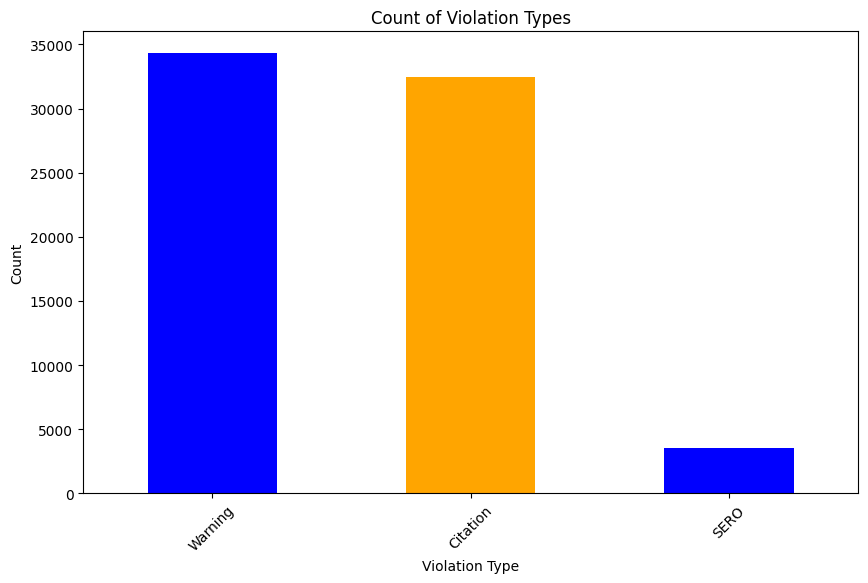

In [ ]:
plt.figure(figsize=(10, 6))
violation_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Count of Violation Types')
plt.xlabel('Violation Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
list(data.columns)
data['Gender'].unique() # maybe drop U?


array(['F', 'M'], dtype=object)

([<matplotlib.patches.Wedge at 0x7a4314445de0>,
 [Text(-0.17502219801414964, -1.0859867541560053, 'M'),
  Text(0.17502229969156693, 1.0859867377692398, 'F')],
 [Text(-0.09546665346226343, -0.592356411357821, '67.1%'),
  Text(0.09546670892267287, 0.5923564024195852, '32.9%')])

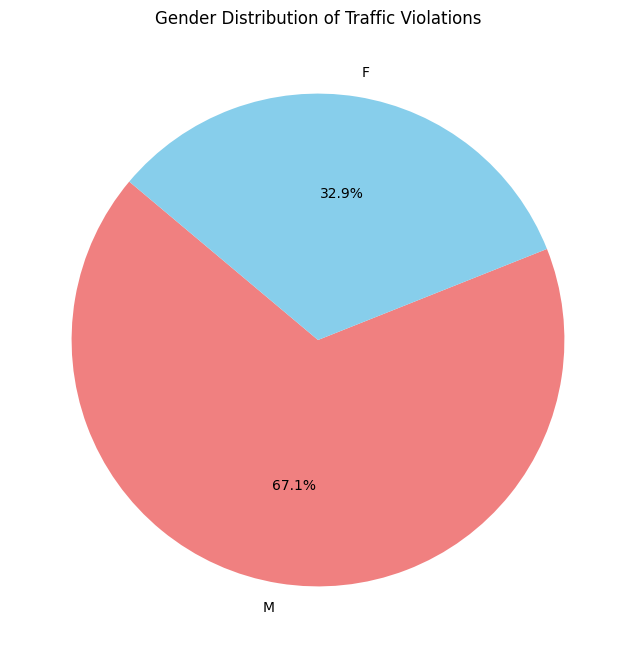

In [ ]:
gender_counts = data['Gender'].value_counts()
actual_gender_percentages = (gender_counts / gender_counts.sum()) * 100


plt.figure(figsize=(8, 8))
plt.title('Gender Distribution of Traffic Violations')
plt.pie(actual_gender_percentages, labels=actual_gender_percentages.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'skyblue'])

# Data Preprocessing - Imputation

According to the description of features in previous parts, of the 21 columns, we have missing values for 'State', 'Year', 'Make', 'Model', 'Color', 'Driver.City', and 'DL.State'. In order to avoid those missing values from skewing our analysis, we are going to perform imputation based on the distribution of those variables.

In [ ]:
# The oldest car made in US is in 1865, so any year before 1865 and any year after 2023 (when the data is collected) is deemed invalid values and need to be imputated
without_missin_year = data[(data['Year'] <= 2023) & (data['Year'] >= 1865)]
# Since the year is normally distributed around 2000s (visualized through bar plot)
# we decide it would be best to impute missing data based on the median within the same manufacture for years.
median_year_manufacture = without_missin_year.groupby('Make').Year.median().astype(int)
overall_median = without_missin_year.Year.median().astype(int)
impute_year = lambda y: y['Year'] if y['Year']<=2023 and y['Year']>=1865 else median_year_manufacture.get(y['Make'], overall_median)
data['Year'] = data.apply(impute_year, axis = 1)

In [ ]:
import random
# From analyzing the manufacture's distribution through value_counts, most of the data are centered around a few very popular manufacture, and a few are from others
# So we will impute missing data in 'Make' by randomly sampling other observed value taking into account their frequency.
all_make = data['Make'].value_counts()
# Since the year is normally distributed around 2000s (visualized through bar plot)
# we decide it would be best to impute missing data based on the median within the same manufacture for years.
impute_make = lambda make: random.choices(all_make.index, weights=all_make.values, k=1)[0] if pd.isnull(make) else make
data['Make'] = data['Make'].apply(impute_make)
data.head()

,Description,Belts,Personal.Injury,Property.Damage,Commercial.License,Commercial.Vehicle,State,VehicleType,Year,Make,...,Color,Charge,Contributed.To.Accident,Race,Gender,Driver.City,Driver.State,DL.State,Arrest.Type,Violation.Type
0,DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...,No,No,No,No,No,NC,02 - Automobile,2013.0,HYUNDAI,...,GRAY,13411f,No,WHITE,F,ASHEVILLE,NC,NC,A - Marked Patrol,Citation
1,DRIVER FAIL TO STOP AT RED TRAFFIC SIGNAL BEFO...,No,No,No,No,No,MD,02 - Automobile,2015.0,FORD,...,SILVER,21202i1,No,OTHER,M,SILVER SPRING,MD,MD,A - Marked Patrol,Citation
2,DRIVING UNDER THE INFLUENCE OF ALCOHOL PER SE,No,No,No,No,No,MD,02 - Automobile,2000.0,TOYOTA,...,BLACK,21902a2,No,BLACK,M,SILVER SPRING,MD,MD,B - Unmarked Patrol,Citation
3,PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,No,No,No,No,No,MD,02 - Automobile,2012.0,HOND,...,BLACK,16303c,No,BLACK,M,COLUMBIA,MD,MD,A - Marked Patrol,Citation
4,DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...,No,No,No,Yes,No,MD,02 - Automobile,2010.0,FORD,...,BLACK,13411f,No,WHITE,M,MOUNT AIRY,MD,MD,A - Marked Patrol,Citation


In [ ]:
# Similarly, for missing model type, most of the data are centered around a few very popular models
# So we will impute missing data in 'Model' by randomly sampling other observed value within the same 'Make' manufacture taking into account their frequency.
all_model = data.groupby('Make').Model.value_counts()
impute_model = lambda row: random.choices(all_model[row['Make']].index, weights=all_model[row['Make']].values, k=1)[0] if pd.isnull(row['Model']) and \
     row['Model'] in all_model else row['Make'] if row['Model'] not in all_model and pd.isnull(row['Model']) else row['Model']
data['Model'] = data.apply(impute_model, axis = 1)
# In the case when the missing 'Model' does not have any observations of the same manufacture in the dataset, we will set the model to be the name of the manufacture
# to preserve the fact that this observation is of a model that is different from all other observations in dataset.

In [ ]:
# Similarly, for missing Color type, most of the observed colors are black, silver, white and very few are other colors
# So we will impute missing data in 'Color' by randomly sampling other observed color taking into account their frequency.
all_color = data['Color'].value_counts()
impute_color = lambda color: random.choices(all_color.index, weights=all_color.values, k=1)[0] if pd.isnull(color) else color
data['Color'] = data['Color'].apply(impute_color)

In [ ]:
# For missing Driver's hometown city, most of the data are centered around a few very popular cities. Logically, Driver's city should match with their States.
# So we will impute missing data in 'Driver.City' by randomly sampling other observed value within the same 'Driver.State' and taking into account their frequency.
all_cities = data.groupby('Driver.State')['Driver.City'].value_counts()
impute_cities = lambda row: random.choices(all_cities[row['Driver.State']].index, weights=all_cities[row['Driver.State']].values, k=1)[0] if \
    pd.isnull(row['Driver.City']) and row['Driver.City'] in all_cities else row['Driver.State'] if row['Driver.City'] not in all_cities and \
    pd.isnull(row['Driver.City']) else row['Driver.City']
data['Driver.City'] = data.apply(impute_cities, axis = 1)
# In the case when the missing city does not have any observations of any city in the same state in the dataset, we will set the model to be the state name
# to preserve the fact that this observation is of a city that is different from all other observations in dataset.

In [ ]:
# we take a snapshot at the observations without missing state values to analyze distribution
without_missing_state = data[(~data['State'].isnull()) & (~data['DL.State'].isnull())]
# Let's look at missing values in 'State' first. Here we are calculating the proportion (probability) the vehical registration state is the same as driver's hometown
# state, the probability of it's the same as DL issue state but different from home state, and the probability of it being different from both.

prop_state_hometown = without_missing_state[without_missing_state['State'] == without_missing_state['Driver.State']].shape[0] / without_missing_state.shape[0]
prop_state_DL = without_missing_state[(without_missing_state['State'] != without_missing_state['Driver.State']) &
                                      (without_missing_state['State'] == without_missing_state['DL.State'])].shape[0] / without_missing_state.shape[0]
prop_state_diff = 1 - prop_state_hometown - prop_state_DL
all_states = without_missing_state.State.value_counts()
# We decide to impute with random sampling taking into account the probability of registration state being the same as home state, DL issue state, etc.
# In the case when we get the random sampling result that State is different from both, we random sample all States observation with frequency taken into account
def impute_state(row):
    state_prob = random.choices(['home', 'DL', 'other'], weights = [prop_state_hometown, prop_state_DL, prop_state_diff], k=1)[0]
    if state_prob == 'home':
      return row['Driver.State']
    elif state_prob == 'DL':
      return row['DL.State']
    else:
      return random.choices(all_states.index, weights=all_states.values, k=1)[0]
data['State'] = data.apply(impute_state, axis=1)

In [ ]:
# Now we apply the same logic to impute missing values in Driver's License issue state ('DL.State')
prop_state_hometown = without_missing_state[without_missing_state['DL.State'] == without_missing_state['Driver.State']].shape[0] / without_missing_state.shape[0]
prop_state_state = without_missing_state[(without_missing_state['DL.State'] != without_missing_state['Driver.State']) &
                                      (without_missing_state['DL.State'] == without_missing_state['State'])].shape[0] / without_missing_state.shape[0]
prop_state_diff = 1 - prop_state_hometown - prop_state_state
all_states = without_missing_state['DL.State'].value_counts()
def impute_state_DL(row):
    state_prob = random.choices(['home', 'state', 'other'], weights = [prop_state_hometown, prop_state_state, prop_state_diff], k=1)[0]
    if state_prob == 'home':
      return row['Driver.State']
    elif state_prob == 'state':
      return row['State']
    else:
      return random.choices(all_states.index, weights=all_states.values, k=1)[0]
data['DL.State'] = data.apply(impute_state_DL, axis=1)

In [ ]:
# Now that our dataset does not contain missing values
print(data.isnull().sum().sum())

0
